# Laboratorium Wstępu do Sztucznej Inteligencji
## Metody probabilistyczne sztucznej inteligencji

Sztuczna Inteligencja to nie tylko sztywne reguły if-else. Ponieważ świat jest chaotyczny i pełen szumu, do jego opisu często wykorzystujemy prawdopodobieństwa.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ustawienie stylu wykresów
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

## Część 1: Twierdzenie Bayesa - Czy ten alarm to fałszywy alarm?

Wyobraź sobie, że na stoisz na przystanku **Arkady Capitol**. Nadjeżdża Konstal 105Na. Widzisz wydobywającą się z niego "mgłę". Czy to pożar instalacji elektrycznej, czy po prostu para wodna z nieszczelnego ogrzewania lub e-papieros pasażera?

Zdefiniujmy zdarzenia:
* $A$: Pożar (Jest ogień/awaria).
* $B$: Dym/Mgła (Widzimy coś podejrzanego).

Wsiadać czy nie wsiadać? Aby odpowiedzieć na to pytanie, musimy obliczyć $P(A|B)$ - szansę, że tramwaj płonie, skoro widzimy dym.

Twierdzenie Bayesa opisuje to wzorem:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Gdzie:

* $A$ : Zdarzenie - pożar.
* $B$ : Zdarzenie - widzimy dym / mgłę.

Zdefiniujmy naszą wiedzę o świecie (tzw. **priors**):

* Prawdopodobieństwo a priori ($P(A)$): Wiemy, że pożary składów są rzadkie. Powiedzmy 1 na 1000 kursów ($0.001$).
* Czułość ($P(B|A)$): Jeśli jest pożar, dym jest prawie pewny ($0.99$).
* Fałszywy alarm ($P(B|\neg A)$): Jeśli pożaru nie ma, dym/para/kurz zdarza się rzadko, ale się zdarza (np. zimą) - np. 5% ($0.05$).

## 🧑‍🎓 Zadanie

(3 pkt.)

Uzupełnij poniższy kod liczący $P(A|B)$. Uruchom kod i zinterpretuj wynik. Zapisz wnioski.

Prawdopodobieństwo pożaru a priori: 0.1%
Prawdopodobieństwo pożaru, gdy widzimy dym: 1.94%


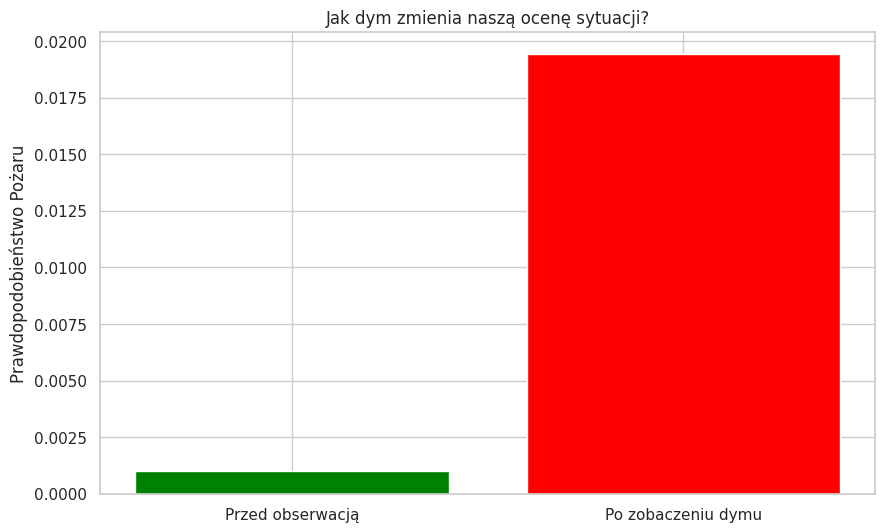

In [2]:
def twierdzenie_bayesa(p_a, p_b_given_a, p_b_given_not_a):
    """
    Oblicza P(A|B) - prawd. pożaru, gdy widzimy dym.
    """
    p_not_a = 1 - p_a
    # Całkowite prawdopodobieństwo dymu P(B)
    p_b = (p_b_given_a * p_a) + (p_b_given_not_a * p_not_a)

    # Bayes
    return (p_b_given_a * p_a) / p_b

# Parametry
p_pozar = 0.001        # P(A)
p_dym_gdy_pozar = 0.99   # P(B|A)
p_dym_gdy_brak = 0.05   # P(B|not A) - np. para wodna

wynik = twierdzenie_bayesa(p_pozar, p_dym_gdy_pozar, p_dym_gdy_brak)

print(f"Prawdopodobieństwo pożaru a priori: {p_pozar*100}%")
print(f"Prawdopodobieństwo pożaru, gdy widzimy dym: {wynik:.2%}")

# Wykres
plt.bar(['Przed obserwacją', 'Po zobaczeniu dymu'], [p_pozar, wynik], color=['green', 'red'])
plt.title("Jak dym zmienia naszą ocenę sytuacji?")
plt.ylabel("Prawdopodobieństwo Pożaru")
plt.show()

Szansa na pożar po zobaczeniu dymu jest większa jednakże nadal niska. Raczej wsiadłbym do takiego tramwaju nie zwracając uwagi na dym.

## Łańcuchy Markowa - Cykl Życia Tramwaju

Zostawmy na chwilę statyczny opis jednego momentu (Bayes) i wprawmy świat w ruch.

Większość procesów w przyrodzie i technice to sekwencje zdarzeń. Tramwaj nie pojawia się znikąd w zajezdni. Musi przejechać trasę, zatrzymać się na światłach, itd. Czasem też, niestety, ulega awarii.

Do modelowania takich zależności możemy wykorzystać Łańcuchy Markowa.
Opierają się one o założenie, że: *Przyszłość zależy tylko od teraźniejszości, a nie od przeszłości.*

### Własność Markowa

Kluczową cechą tego modelu jest tzw. brak pamięci (Memorylessness). Założenie jest proste: To, co wydarzy się w następnym kroku ($t+1$), zależy WYŁĄCZNIE od stanu, w którym jesteśmy teraz ($t$), a nie od tego, jak się tu znaleźliśmy.


$$P(S_{t+1} | S_t, S_{t-1}, ..., S_0) = P(S_{t+1} | S_t)$$


W myśl tego założenia, jeżeli tramwaj stoi na światłach na Legnickiej ($S_t = Postój$), to szansa, że ruszy, jest taka sama, niezależnie od tego, czy jechał wcześniej godzinę bez przerwy, czy stał w korku przez pół dnia.

### Model: Dzień z życia MPK

Zbudujmy zatem model zachowania wrocławskiego tramwaju (np. linii "10").
Zdefiniujmy Przestrzeń Stanów ($S$):
* Jazda - Tramwaj przemieszcza się między przystankami.
* Postój - Wymiana pasażerów lub czerwone światło.
* Awaria - Stan krytyczny (np. wykolejenie lub dym).
* Zjazd - Zjazd do zajezdni (np. Ołbin, Borek). To tzw. Stan Pochłaniający (Absorbing State) - jak tramwaj tu trafi, to już nie wyjedzie (w ramach naszej symulacji).

### Macierz Przejścia (Transition Matrix)
Macierz przejścia $T$ jest sercem naszego modelu. Opisuje ona prawdopodobieństwo przejścia z jednego stanu do drugiego.

Przyjmijmy realistyczne (jak na Wrocław) założenia:

* Z Jazdy najczęściej trafiamy znowu w Jazdę (długi odcinek) lub Postój.
* Awaria zdarza się rzadko (powiedzmy 1%), ale jak już wystąpi, to ciężko z niej wrócić do Jazdy. Zazwyczaj kończy się to Zjazdem do zajezdni (90%).


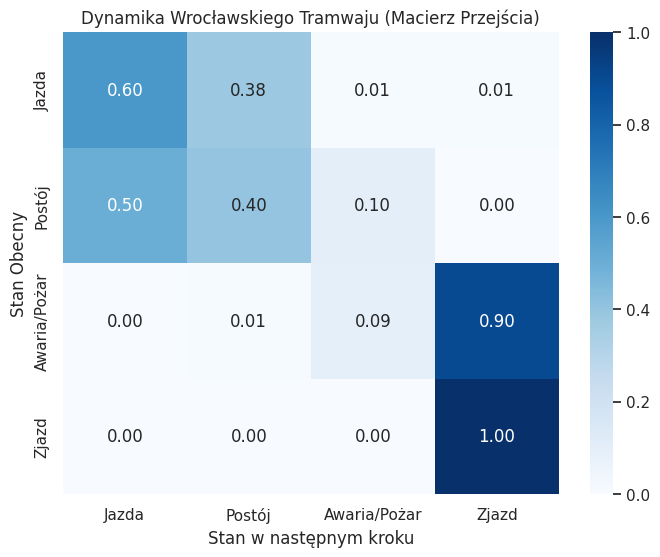

In [114]:
# Definicja stanów
stany = ["Jazda", "Postój", "Awaria/Pożar", "Zjazd"]

# Macierz Przejścia (T)
# Wiersze (TERAZ) -> Kolumny (JUTRO)
# Suma każdego wiersza MUSI wynosić 1 (100% prawdopodobieństwa)

T = np.array([
    # Do: Jazda, Postój, Awaria, Zjazd
    [0.6, 0.38, 0.01, 0.01], # Z JAZDY: Często jedziemy dalej, czasem stajemy. Ryzyko awarii małe.
    [0.50, 0.40, 0.1, 0.00], # Z POSTOJU: Ruszamy (50%) lub stoimy dalej. Większa szansa awarii przy ruszaniu.
    [0.00, 0.01, 0.09, 0.90], # Z AWARII: Raczej koniec trasy (Zjazd), mała szansa że motorniczy to naprawi na miejscu.
    [0.00, 0.00, 0.00, 1.00]  # ZE ZJAZDU: Koniec gry. Tramwaj zostaje w zajezdni.
])

# Sprawdzenie poprawności macierzy (czy wiersze sumują się do 1)
assert np.allclose(T.sum(axis=1), 1), "Prawdopodobieństwo musi sumować się do 1."

# Wizualizacja Macierzy Przejścia
plt.figure(figsize=(8, 6))
sns.heatmap(T, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=stany, yticklabels=stany)
plt.title("Dynamika Wrocławskiego Tramwaju (Macierz Przejścia)")
plt.ylabel("Stan Obecny")
plt.xlabel("Stan w następnym kroku")
plt.show()

### Symulacja Monte Carlo

Skoro mamy model, "puśćmy" tramwaj na tory. Użyjemy metody Monte Carlo, czyli będziemy losować kolejne kroki zgodnie z naszymi prawdopodobieństwami.

Symulujemy 20 kroków czasowych (np. minut). Zobaczymy, czy tramwaj dojedzie do pętli, czy skończy w zajezdni po awarii.

In [183]:
def symulacja_trasy(kroki, start_idx=0):
    """
    Symuluje losy tramwaju przez zadaną liczbę kroków.
    start_idx=0 oznacza start od stanu 'Jazda'.
    """
    historia = [start_idx]
    aktualny_stan = start_idx

    for _ in range(kroki):
        # Magia numpy: losujemy następny stan (0,1,2,3)
        # z wagami (p) wziętymi z wiersza aktualnego stanu
        nastepny_stan = np.random.choice(
            [0, 1, 2, 3],
            p=T[aktualny_stan]
        )

        historia.append(nastepny_stan)
        aktualny_stan = nastepny_stan

        # Jeśli trafiliśmy do Zjazdu (stan 3), przerywamy - to koniec trasy
        if aktualny_stan == 3:
            break

    return historia

# --- URUCHOMIENIE SYMULACJI ---
# Uruchom ten kod kilka razy (Ctrl+Enter), żeby zobaczyć różne scenariusze

trasa = symulacja_trasy(1000)
opis_trasy = [stany[i] for i in trasa]

print(f"Raport z trasy (Liczba kroków: {len(trasa)-1}):")

# Ładne wyświetlenie ze strzałkami
print(" -> ".join(opis_trasy))

# Komentarz sytuacyjny
if "Awaria/Pożar" in opis_trasy:
    print("\n🚨 UWAGA: Wystąpiła awaria na trasie!")
    if trasa[-1] == 3:
      print("\n❌ Tramwaj zjechał awaryjnie do zajezdni.")
elif trasa[-1] == 3:
    print("\n🏠 Tramwaj zjechał do zajezdni.")
else:
    print("\n✅ Tramwaj na trasie.")

Raport z trasy (Liczba kroków: 8):
Jazda -> Postój -> Postój -> Postój -> Postój -> Jazda -> Postój -> Awaria/Pożar -> Zjazd

🚨 UWAGA: Wystąpiła awaria na trasie!

❌ Tramwaj zjechał awaryjnie do zajezdni.


## 🧑‍🎓 Zadanie

(1 pkt.)

W powyższym kodzie zmień długość symulacji z 20 na 1000 kroków. Uruchom kod kilkukrotnie. Jaka była najdłuższa liczba kroków trasy? Jak często tramwaj kończył na zajezdni? Czy coś się zmieniło?

Najdłuższa trasa jaką uzyskałem to 124. Ogółem całkiem często zjeżdża do zajezdni. Trasa raczej nie wykracza poza 30 kroków

## Symulacja vs rozwiązanie analityczne

Symulacja Monte Carlo (którą zrobiliśmy przed chwilą) to metoda przybliżona. Jest świetna, gdy system jest zbyt skomplikowany, by go policzyć "na kartce", lub gdy chcemy zobaczyć przykładową pojedynczą ścieżkę ("dzień z życia").

W łańcuchach Markova możemy jednak określić prawdopodobieństwa przyszłych stanów analitycznie (dokładnie), bez rzucania kostką.

#### Metoda 1: Monte Carlo (Symulacja)
* Puszczamy tramwaj wiele razy (tutaj 10,000) i liczymy, ile razy dojechał do celu.
* Zaleta: Łatwa do zrozumienia, pozwala wizualizować pojedyncze historie.
* Wada: Wynik jest zawsze przybliżony (np. 19.9% zamiast 20%).
#### Metoda 2: Potęgowanie Macierzy
* Jeśli macierz $T$ opisuje zmianę w jednym kroku, to macierz $T^n$ ($T$ do potęgi $n$-tej) opisuje prawdopodobieństwa przejścia dokładnie po $n$ krokach.

$$P(Stan_n) = P(Stan_0) \cdot T^n$$

* Zaleta: Wynik jest dokładny.
* Wada: Wymaga operacji na macierzach (trudne przy milionach stanów, ale łatwe dla 4 stanów tramwaju).



## 🧑‍🎓 Zadanie

(3 pkt.)

Wykorzystaj poniższą komórkę i zbadaj:
* Czy metoda Monte Carlo daje przybliżony wynik do podejścia analitycznego? Jak zmieniają się jej wyniki ze zmianą liczby symulacji?
* Jak zmieniają się prawdopodobieństwa poszczególnych stanów przy zmienianiu liczby kroków?

--- GDZIE BĘDZIE TRAMWAJ ZA 20 MINUT? ---
           Stan  Działanie na macierzach  Symulacja Monte Carlo
0         Jazda                   0.2087                 0.2042
1        Postój                   0.1452                 0.1464
2  Awaria/Pożar                   0.0194                 0.0187
3         Zjazd                   0.6267                 0.6307


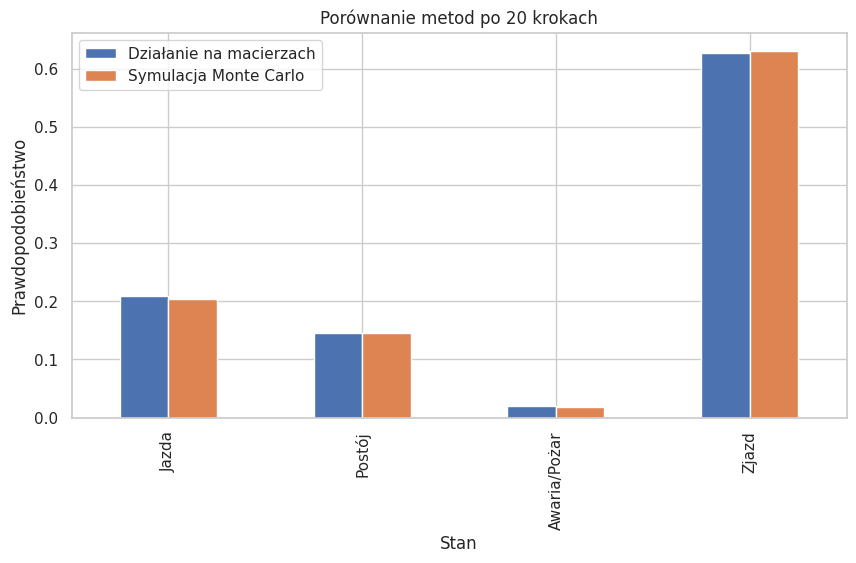

In [190]:
# --- MATEMATYKA (DOKŁADNA) VS MONTE CARLO (PRZYBLIŻONA) ---

# 1. Podejście Analityczne (Algebra Liniowa)
# Np. gdzie będzie tramwaj za 10, 20, ..., 100 kroków (minut)?
kroki = 20

# Podnosimy macierz T do potęgi n
# T_n to macierz prawdopodobieństw przejścia z dowolnego stanu do dowolnego po n krokach
T_n = np.linalg.matrix_power(T, kroki)

# Stan początkowy: [1, 0, 0, 0] -> Jesteśmy w 100% w stanie "Jazda" (indeks 0)
stan_startowy = np.array([1, 0, 0, 0])

# Mnożenie wektora przez macierz
rozklad_prawd_po_10_krokach = np.dot(stan_startowy, T_n)


# 2. Podejście Monte Carlo (dla porównania)
liczba_symulacji = 10000
wyniki_mc = []

for _ in range(liczba_symulacji):
    # Używamy naszej funkcji z poprzedniej komórki, bierzemy tylko ostatni stan
    historia = symulacja_trasy(kroki, start_idx=0)
    wyniki_mc.append(historia[-1]) # Gdzie jest tramwaj po n krokach?

# Zliczamy wyniki
counts = pd.Series(wyniki_mc).value_counts(normalize=True).sort_index()
# Uzupełniamy brakujące stany zerami (jeśli np. nie było Awarii)
counts = counts.reindex([0, 1, 2, 3], fill_value=0)


# --- PREZENTACJA WYNIKÓW ---
df_porownanie = pd.DataFrame({
    'Stan': stany,
    'Działanie na macierzach': rozklad_prawd_po_10_krokach,
    'Symulacja Monte Carlo': counts.values
})

print(f"--- GDZIE BĘDZIE TRAMWAJ ZA {kroki} MINUT? ---")
print(df_porownanie.round(4))

# Wizualizacja błędu
df_porownanie.set_index('Stan').plot(kind='bar', figsize=(10, 5))
plt.title(f"Porównanie metod po {kroki} krokach")
plt.ylabel("Prawdopodobieństwo")
plt.show()

Nim większa liczba symulacji tym wynik zbliża sie do wyniky analizy matematycznej. Przy zwiększeniu liczby kroków zwiększa się szansa na Zjazd i zmniejsza na inne końcowe stany.

## Ukryte Modele Markowa (HMM) - Co się dzieje za zaparowaną szybą?

W łańcuchach Markowa zakładaliśmy, że widzimy wszystko jak na dłoni. Jeśli tramwaj stał w korku, to wiedzieliśmy, że to stan `Korek`.

Ale w prawdziwym życiu (i w AI) rzadko mamy taki luksus. Często **widzimy tylko objawy (obserwacje)**, a **przyczyna (stan ukryty)** jest niewidoczna.

* Lekarz widzi *gorączkę* (Obserwacja), ale choroba (*Grypa*) jest ukryta.
* Asystent głosowy słyszy *dźwięk* (Obserwacja), ale słowo (*"Wrocław"*) jest ukryte.
* My widzimy *ludzi wybiegających z tramwaju*, ale co się dzieje w środku?

Gdybyśmy byli pasażerami Titanica to:

* **Łańcuch Markowa:** Widzielibyśmy całą górę lodową.
* **HMM (Hidden Markov Model):** Widzielibyśmy tylko czubek góry nad wodą (Obserwacje). Na jej podstawie musielibyśmy zgadnąć, jak wygląda gigantyczna bryła pod wodą (Stany Ukryte), wiedząc, jak góry lodowe są zazwyczaj zbudowane.

### Scenariusz: Dylemat na Placu Grunwaldzkim

Jest godzina 15:00 i jesteś po zajęciach na Politechnice Wrocławskiej. Czekasz na tramwaj linii 10. Ten podjeżdża na peron, ale ma **zaparowane szyby**. Nie widząc wnętrza musisz odgadnąć, czy w środku jest bezpiecznie, czy trwa kontrola biletów, a może... wybuchł pożar?

Nasz model składa się z dwóch warstw:

1. **Warstwa Ukryta (To, co się dzieje naprawdę):**
* `Normalna Jazda` (Spokojny codzienny kurs)
* `KONTROLA` (Padło hasło: "Bilety do kontroli!")
* `POŻAR` (Dym i ogień)


2. **Warstwa Obserwacji (To, co widzimy na zewnątrz):**
* `Spokój` (Pasażerowie wysiadają spokojnie)
* `Panika` (Nerwowe ruchy wysiadających pasażerów)
* `Ucieczka` (Sprint przez drzwi)
* `Kaszel` (Wycodzący pasażerowie się krztuszą - **kluczowy objaw**)

### Matematyka Modelu

HMM definiujemy przez trzy macierze:

1. **Macierz Przejścia ($A$):** Jak w zwykłym łańcuchu Markowa (np. `Normalna`  `Kontrola`).
2. **Macierz Emisji ($B$):** Prawdopodobieństwo zobaczenia konkretnego objawu w danym stanie (np. P(`Kaszel` | `POŻAR`)).
3. **Prawdopodobieństwo Startowe ($\pi$):** Czego spodziewamy się na początku?

In [191]:
# --- 1. DEFINICJA MODELU (ŚWIAT RZECZYWISTY) ---

# Stany Ukryte (Hidden States)
states = ["Normalna Jazda", "KONTROLA", "POŻAR"]
n_states = len(states)

# Obserwacje (Observations)
observations = ["Spokój", "Panika", "Ucieczka", "Kaszel"]
n_obs = len(observations)

# Mapowanie nazw na indeksy (dla wygody)
obs_map = {name: i for i, name in enumerate(observations)}

# A. Prawdopodobieństwo Startowe (pi)
# Zazwyczaj tramwaj podjeżdża normalnie. Kontrola rzadko, pożar bardzo rzadko.
start_prob = np.array([0.90, 0.09, 0.01])

# B. Macierz Przejścia (Transition Matrix) - Zmiana stanów ukrytych
# Wiersze: Skąd -> Kolumny: Dokąd
trans_mat = np.array([
    # Normalna, Kontrola, Pożar
    [0.90, 0.09, 0.01],  # Z Normalnej: zazwyczaj dalej normalnie, czasem wsiadają kanary
    [0.40, 0.60, 0.00],  # Z Kontroli: trwa chwilę, potem wraca do normy (kanary wysiadają)
    [0.00, 0.00, 1.00]   # Z Pożaru: stan absorbujący. Jak się pali, samo nie zgaśnie.
])

# C. Macierz Emisji (Emission Matrix) - Co widzimy?
# Wiersze: Stan Ukryty -> Kolumny: Prawdopodobieństwo Obserwacji
emission_mat = np.array([
    # Spokój, Panika, Ucieczka, Kaszel
    [0.90, 0.09, 0.01, 0.01],  # Normalna: Głównie spokój, czasem ktoś biegnie (spieszy się) lub zakaszle
    [0.05, 0.70, 0.25, 0.01],  # KONTROLA: Panika (szukanie biletu), Ucieczka. Rzadko kaszel
    [0.00, 0.10, 0.40, 0.50]   # POŻAR: Ucieczka i KASZEL (dym). To odróżnia go od kontroli.
])

print(f"Szansa na kaszel podczas kontroli: {emission_mat[1, 3]}")
print(f"Szansa na kaszel podczas pożaru: {emission_mat[2, 3]}")

Szansa na kaszel podczas kontroli: 0.01
Szansa na kaszel podczas pożaru: 0.5


### Algorytm Viterbiego (Dekodowanie)

Wiemy już jakie są prawdopodobieństwa poszczególnych emisji w zależności od stanów. Mamy sekwencję obserwacji (np. `Panika`, `Ucieczka`, `Kaszel`). Algorytm Viterbiego znajduje **najbardziej prawdopodobną ścieżkę stanów ukrytych**, która wygenerowała te obserwacje.

In [211]:
def viterbi_decoder(obs_sequence, states, start_p, trans_mat, emit_mat):
    """
    Znajduje najbardziej prawdopodobną sekwencję stanów ukrytych dla danych obserwacji.
    """
    T = len(obs_sequence) # Długość czasu
    N = len(states)       # Liczba stanów

    # Tabela Viterbiego (przechowuje log-prawdopodobieństwa)
    # Używamy logarytmów, żeby liczby nie stały się zbyt małe (np. 0.00000001)
    # Dodajemy małą stałą epsilon (1e-12) by uniknąć log(0)
    epsilon = 1e-12
    V = np.zeros((N, T))

    # Tabela ścieżek (Backpointers) - zapamiętuje, skąd przyszliśmy
    path = np.zeros((N, T), dtype=int)

    # 1. INICJALIZACJA (t=0)
    first_obs = obs_sequence[0]
    V[:, 0] = np.log(start_p + epsilon) + np.log(emit_mat[:, first_obs] + epsilon)

    # 2. REKURENCJA (t=1 do T-1)
    for t in range(1, T):
        this_obs = obs_sequence[t]
        for s in range(N): # Dla każdego stanu obecnego
            # Obliczamy prawdopodobieństwo przejścia ze wszystkich poprzednich stanów do obecnego 's'
            # Wzór: P(poprzedni) * P(przejście) * P(emisja)
            # W logarytmach mnożenie zamienia się na dodawanie
            trans_probs = V[:, t-1] + np.log(trans_mat[:, s] + epsilon)

            # Wybieramy najlepszego poprzednika
            best_prev = np.argmax(trans_probs)
            path[s, t] = best_prev

            # Zapisujemy wynik
            V[s, t] = trans_probs[best_prev] + np.log(emit_mat[s, this_obs] + epsilon)

    # 3. TERMINACJA (Najlepszy stan końcowy)
    best_last_state = np.argmax(V[:, -1])

    # 4. BACKTRACKING (Odtwarzanie ścieżki od tyłu)
    best_path = [best_last_state]
    for t in range(T-1, 0, -1):
        prev_state = path[best_path[-1], t]
        best_path.append(prev_state)

    # Odwracamy ścieżkę, żeby była od początku do końca
    best_path = best_path[::-1]

    # Konwersja indeksów na nazwy
    return [states[i] for i in best_path]

Wyobraź sobie następującą sytuację na przystanku:

1. Wychodzi pierwsza osoba: **Panika** (Nerwowo grzebie w torebce). *Myślimy: "Pewnie kontrola".*
2. Wychodzi druga osoba: **Ucieczka** (Wybiega szybko). *Myślimy: "Na bank kanary, ucieka bez biletu".*
3. Wychodzi trzecia osoba: **KASZEL** (Dusi się). *Myślimy: "Zaraz... przy kontroli się nie kaszle. To dym!"*
4. Wychodzi czwarta osoba: **Ucieczka**. *Myślimy: "Pożar!"*

Sprawdźmy, czy algorytm też dojdzie do takich wniosków i - co najważniejsze - czy zmieni zdanie wstecznie!


--- RAPORT Z SYSTEMU BEZPIECZEŃSTWA MPK ---
 Krok Co widzisz (Obserwacja)  Wnioskowanie
    1                  Panika    🙂 Normalna
    2                Ucieczka 👮‍♂️ KONTROLA
    3                  Kaszel       🔥 POŻAR
    4                Ucieczka       🔥 POŻAR


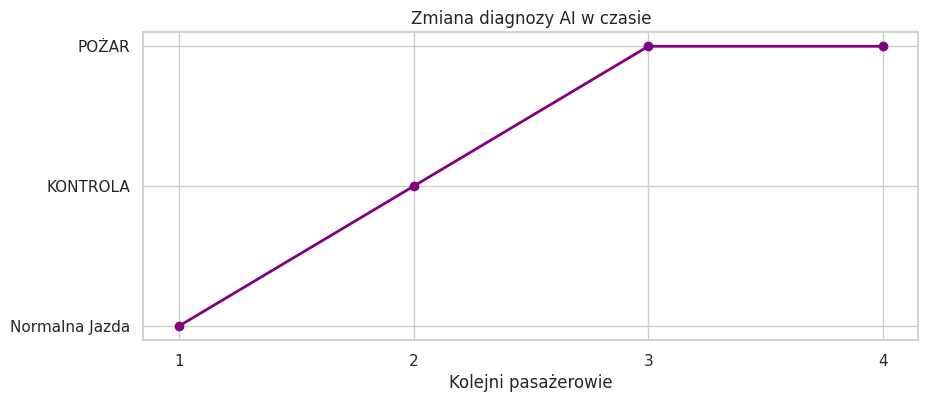

In [212]:
# --- URUCHOMIENIE SCENARIUSZA ---

# Sekwencja zdarzeń (nazwy)
emissions_sequence = ["Panika", "Ucieczka", "Kaszel", "Ucieczka"]

# Zamiana na indeksy
scenario_indices = [obs_map[name] for name in emissions_sequence]

# Uruchamiamy AI
decoded_states = viterbi_decoder(scenario_indices, states, start_prob, trans_mat, emission_mat)

# --- WIZUALIZACJA WYNIKÓW ---
import pandas as pd

results = pd.DataFrame({
    'Krok': range(1, 5),
    'Co widzisz (Obserwacja)': emissions_sequence,
    'Co myśli AI (Stan Ukryty)': decoded_states
})

# Dodajmy ikony dla lepszego efektu
def add_icon(state):
    if state == "POŻAR": return "🔥 POŻAR"
    if state == "KONTROLA": return "👮‍♂️ KONTROLA"
    return "🙂 Normalna"

results['Wnioskowanie'] = results['Co myśli AI (Stan Ukryty)'].apply(add_icon)

print("\n--- RAPORT Z SYSTEMU BEZPIECZEŃSTWA MPK ---")
print(results[['Krok', 'Co widzisz (Obserwacja)', 'Wnioskowanie']].to_string(index=False))

# Wykres (dla wzrokowców)
plt.figure(figsize=(10, 4))
plt.plot(results['Krok'], results['Co myśli AI (Stan Ukryty)'], marker='o', linestyle='-', color='purple', linewidth=2)
plt.title("Zmiana diagnozy AI w czasie")
plt.xlabel("Kolejni pasażerowie")
plt.xticks(range(1, len(emissions_sequence)+1))
plt.yticks(states)
plt.grid(True)
plt.show()

Spójrz na wynik (Tabelę lub Wykres). To jest **magia Viterbiego**.

1. W kroku 1 i 2 model widział "Panikę" i "Ucieczkę". Statystycznie (z macierzy emisji) te objawy pasują do **KONTROLI**.
2. Jednak w kroku 3 pojawił się "Kaszel". W naszej macierzy emisji szansa na kaszel przy kontroli wynosi 0.
3. Algorytm zrozumiał, że sekwencja `KONTROLA -> KONTROLA -> KONTROLA` jest niemożliwa (przez ten kaszel).
4. Alternatywna ścieżka: `POŻAR -> POŻAR -> POŻAR` nagle stała się jedyną logiczną opcją, mimo że pożar jest rzadki.
5. **Co ważne:** Ponieważ prawdopodobieństwo wybuchu pożaru w czasie gdy nic się nie dzieje jest niskie (0.01), a w czasie kontroli jest równe 0, algorytm uznał, że pożar trwał już od kroku 1. Wstecznie zinterpretował "Panikę" nie jako strach przed mandatem, ale jako strach przed ogniem.

## 🧑‍🎓 Zadanie
(3 pkt.)

W powyższym przykładzie zmień prawdopodobieństwa tak, aby w czasie wysiadania algorytm przewidywał każdy ze stanów przynajmniej po razie. Wklej w komórkę poniżej Twoje zmienne `start_prob, trans_mat, emission_mat, emissions_sequence` oraz **wynik działania algorytmu** (przewidywane stany). Zinterpretuj wynik własnymi słowami - jaki według algorytmu był najbardziej prawdopodobny przebieg zdarzeń?

In [210]:
# A. Prawdopodobieństwo Startowe (pi)
# Zazwyczaj tramwaj podjeżdża normalnie. Kontrola rzadko, pożar bardzo rzadko.
start_prob = np.array([0.90, 0.1, 0.0])

# B. Macierz Przejścia (Transition Matrix) - Zmiana stanów ukrytych
# Wiersze: Skąd -> Kolumny: Dokąd
trans_mat = np.array([
    # Normalna, Kontrola, Pożar
    [0.30, 0.59, 0.11],  # Z Normalnej: zazwyczaj dalej normalnie, czasem wsiadają kanary
    [0.20, 0.20, 0.60],  # Z Kontroli: trwa chwilę, potem wraca do normy (kanary wysiadają)
    [0.40, 0.30, 0.30]   # Z Pożaru: stan absorbujący. Jak się pali, samo nie zgaśnie.
])

# C. Macierz Emisji (Emission Matrix) - Co widzimy?
# Wiersze: Stan Ukryty -> Kolumny: Prawdopodobieństwo Obserwacji
emission_mat = np.array([
    # Spokój, Panika, Ucieczka, Kaszel
    [0.70, 0.09, 0.01, 0.01],  # Normalna: Głównie spokój, czasem ktoś biegnie (spieszy się) lub zakaszle
    [0.25, 0.30, 0.24, 0.21],  # KONTROLA: Panika (szukanie biletu), Ucieczka. Rzadko kaszel
    [0.30, 0.10, 0.40, 0.20]   # POŻAR: Ucieczka i KASZEL (dym). To odróżnia go od kontroli.
])

## Dodatek dla ciekawych:

Mnożenie macierzy przez samą siebie 1000 razy (nawet algorytmami szybkiego potęgowania) jest kosztowne obliczeniowo, zwłaszcza gdybyśmy mieli dużą macierz, np. 1000x1000, a nie 4x4.

Aby uprościć obliczenia możemy wykorzystać Diagonalizację Macierzy (rozkład na wartości i wektory własne). To technika, która pozwala nam zamienić żmudne mnożenie macierzy na proste potęgowanie zwykłych liczb.

Zamiast iść na piechotę ($T \cdot T \cdot T \dots$), możemy skorzystać z rozkładu macierzy $T$:

$$T = P \cdot D \cdot P^{-1}$$

Gdzie:
* $P$ to macierz wektorów własnych (eigenvectors).
* $D$ to macierz diagonalna z wartościami własnymi (eigenvalues) na przekątnej.
* $P^{-1}$ to macierz odwrotna do $P$.

Gdy podnosimy $T$ do kwadratu:

$$T^2 = (P \cdot D \cdot P^{-1}) \cdot (P \cdot D \cdot P^{-1})$$

Ponieważ $P^{-1} \cdot P = I$ (macierz jednostkowa, która nic nie zmienia), środkowe wyrazy się kasują!

$$T^2 = P \cdot D \cdot I \cdot D \cdot P^{-1} = P \cdot D^2 \cdot P^{-1}$$

Zatem wzór ogólny na dowolną potęgę $n$ to:

$$T^n = P \cdot D^n \cdot P^{-1}$$

Potęgowanie macierzy diagonalnej $D$ jest trywialne - po prostu podnosimy liczby na przekątnej do potęgi $n$. To operacja błyskawiczna, nawet dla np. $n=10^6$. Warto jednak pamiętać, że sam rozkład macierzy jest operacją skomplikowaną obliczeniowo i nie zawsze możliwą do przeprowadzenia w sposób dokładny.